In [1]:
import numpy as np
import pandas as pd

#librerie grafiche
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
#load dataset
column_names = [
    "job", "group", "job_type", "host_name", 
    "just_started", "just_finished", "job_status", 
    "cores_used", "power_HS6_core", "power_HS6_machine", 
    "cpu_time", "job_time", "owner", "ram_memory", 
    "total_memory", "unix_time", "machine", "disk"
]

categorical_vars = [ 
    "job_id", "group", "job_type", "host_name", "just_started", 
    "just_finished", "job_status", "owner", "machine"
]

data = pd.read_csv(
    '../data/jobs_1666874881.bz2', 
    sep=" ", 
    names=column_names,
    dtype={c: "category" for c in categorical_vars},
    compression="bz2")

In [7]:
data[:5]

,job_id,group,job_type,host_name,just_started,just_finished,job_status,cores_used,power_HS6_core,power_HS6_machine,cpu_time,job_time,owner,ram_memory,total_memory,unix_time,machine,disk
0,7652798.0,cms,grid,cn-608-02-07,false,0,2,8,11.555556,832.0,1480299.0,211485,cmsprd004,3.671904,18.118656,1666663396,ce04-htc,0.420770
1,7652807.0,cms,grid,cn-609-05-03,false,0,2,8,11.555556,832.0,1438626.0,211443,cmsprd004,2.316532,16.779932,1666663438,ce04-htc,0.353494
2,7652808.0,cms,grid,wn-205-08-05-03-a,false,0,2,8,14.218750,910.0,1219659.0,211318,cmsprd004,2.369088,16.993980,1666663563,ce04-htc,0.357692
3,7652818.0,cms,grid,cn-608-02-06,false,0,2,8,11.555556,832.0,1416575.0,211234,cmsprd004,2.316400,17.026332,1666663648,ce04-htc,0.356569
4,7652845.0,cms,grid,cn-610-06-09,false,0,2,8,11.555556,832.0,1417877.0,211108,cmsprd004,2.317612,16.879416,1666663774,ce04-htc,0.359767


Ogni 3 minuti viene fornita un'istantanea dei jobs running o recenti.

### Significati delle colonne
- `jobid`
- coda / `gruppo`
- `tipo di job`: 
    - grid
    - local
- `hostname` dove gira il job
- true se e' "giovane" (`iniziato da meno di 3 min`) false altrimenti
- 0 se `finito da meno di 3 minuti`, 1 altrimenti
- `jobstatus`: 
    - 1 = pending (in coda); 
    - 2 = running; 
    - 3 = rimosso; 
    - 4 = finito; 
    - 5 = "sospeso" (qui vale come rimosso)
- `numero di core` usati dal job
- `potenza` in HS06 di un `core` nella macchina dove gira il job
- `potenza` totale in HS06 della `macchina` dove gira il job
- `CPUtime in secondi` del job (user time + system time)
- da `quanti secondi e' iniziato` il job
- `owner` del job (utente unix che lo esegue)
- `memoria RAM` in GB usata dal job
- `memoria "totale` usata dal job (ram + swap + "pagine")
- tempo di inizio del job in "epoch" (`secondi trascorsi dalle ore 0 del 1/1/1970`), detto anche "timestamp unix"
- da quale `macchina e' stato sottomesso il job`
- `disco` in uso dal job, in GB

In [25]:
data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55197 entries, 0 to 55196
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job_id             55197 non-null  category
 1   group              55197 non-null  category
 2   job_type           55197 non-null  category
 3   host_name          55197 non-null  category
 4   just_started       55197 non-null  category
 5   just_finished      55197 non-null  category
 6   job_status         55197 non-null  category
 7   cores_used         55197 non-null  int64   
 8   power_HS6_core     55197 non-null  float64 
 9   power_HS6_machine  55197 non-null  float64 
 10  cpu_time           55197 non-null  float64 
 11  job_time           55197 non-null  int64   
 12  owner              55197 non-null  category
 13  ram_memory         55197 non-null  float64 
 14  total_memory       55197 non-null  float64 
 15  unix_time          55197 non-null  int64   
 16  mach

In [30]:
data["cores_used"].value_counts()

1    51708
8     3433
2       23
4       23
3        5
6        5
Name: cores_used, dtype: int64

<AxesSubplot: >

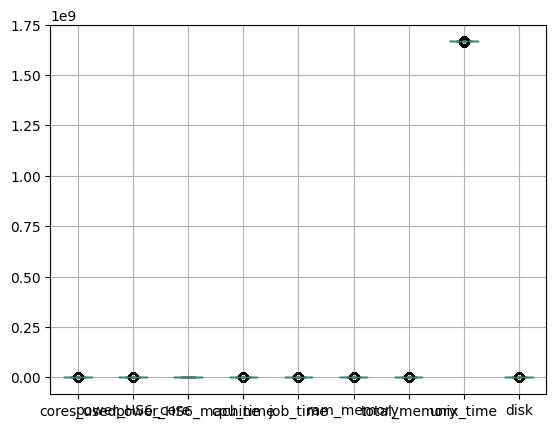

In [31]:
data.boxplot()

In [41]:
jobs_per_group = data.groupby('group').job_id.count()
jobs_per_group.sort_values

# plt.figure(figsize=(7, 5))
# plt.title('Distribuzione del numero di job tra i gruppi')
# ax = sns.barplot(x = jobs_per_group, y = jobs_per_group.index)
# sns.despine(left = True, bottom = False)
# ax.set(xlabel='jobs')
# plt.show()

<bound method Series.sort_values of group
alice             955
ams.analysis     2848
ams.prod         4497
atlas            5212
auger            1499
belle              39
borexino           21
clas12vo          431
cms              1460
cta               327
cuore             694
dampe            3962
darkside         2442
herd              299
icarus           5319
juno             1308
lhcb            14862
lhcf                7
limadou            89
na62                1
neutrino         8479
nucleus            60
tristan            48
undefined           1
virgo.vligo       323
xenon              14
Name: job_id, dtype: int64>

In [42]:
data.groupby('job_type').size()

job_type
grid     23321
local    31876
dtype: int64